This notebook provides instructions on how to run the single-objective GA and offers some figures to interpret the learning and visualise the prescribed solutions.

# 1. Run the GA

To run the GA:

1. Make sure you activate the correct environment (with DEAP installed etc.):

`source activate myenv`

2. Excecute the following command in the ferminal from within this folder (preferably using a machine with multiple cores to harness the power of multiprocessing):

`python ../../../src/GA/Single_obj/GA_singleObj.py 1`

The argument provided corresponds to the chosen demand scenario (1: low-demand, 2: high-demand).

Make sure you first change some of the key values in `src/GA/Single_obj/GA_singleObj.py` of the GA if you apply it to another police force than Detroit. In particular:

- MAX_NUM_AGENTS = 60 # maximum num agents in the force
- NUM_PATROL_BEATS = 131 # number of patrol beats in the force

Note: On the Univeristy of Leeds HPC (40 nodes), this script takes 7 hours to run both demand scenarios for 40 generations with 80 individuals

The results should be placed in `results` > `scenario1` folder.

# 2. Visualise GA results

In [16]:
import os
import pickle
import networkx as nx
import matplotlib.ticker as ticker
import imageio
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

In [2]:
from deap import base
from deap import creator
from deap import tools

# Initialise the Fitness and Individual DEAP objects
creator.create("Fitness", base.Fitness, weights=(-1.0,)) 
creator.create("Individual", list, fitness=creator.Fitness)

In [3]:
# Choose a scenario
scenario_num = 1

In [4]:
with open('./results/scenario{}/logbook_file_scenario{}'.format(scenario_num, scenario_num), 'rb') as f:
    logbook = pickle.load(f)
print(logbook)

   	     	                 fitness                 	    num_vehicles   
   	     	-----------------------------------------	-------------------
gen	evals	min    	max    	avg    	median 	std      	min	avg   	max
0  	     	3.70588	30.6923	10.0544	7.42647	6.61435  	2  	32    	60 
1  	     	3.05   	18.2941	5.00125	4.10417	2.5175   	7  	43.525	60 
2  	     	3.51429	6.58824	4.15343	3.95714	0.68523  	30 	47.975	60 
3  	     	3.42857	1000   	53.6401	3.85714	217.11   	44 	51.525	61 
4  	     	3.2381 	1000   	78.548 	3.60952	262.383  	44 	53.225	63 
5  	     	3.48276	1000   	53.801 	3.89655	217.073  	38 	52.15 	61 
6  	     	3.3    	1000   	53.5172	3.76667	217.138  	42 	51.6  	63 
7  	     	3.3    	8.08108	4.41084	3.67105	1.50796  	43 	50.4  	59 
8  	     	3.42857	4.61905	3.63794	3.52381	0.265416 	45 	51.05 	59 
9  	     	3.45455	1000   	53.5404	3.69318	217.133  	45 	52.95 	64 
10 	     	3.47727	1000   	53.9125	4.20833	217.047  	47 	55.625	63 
11 	     	3.5    	1000   	28.6703	3.76667	155.537  	

In [5]:
logbook.chapters

defaultdict(deap.tools.support.Logbook,
            {'fitness': [{'min': 3.7058823529411766,
               'max': 30.692307692307693,
               'avg': 10.054416842815426,
               'median': 7.4264705882352935,
               'std': 6.614349730617249,
               'gen': 0,
               'nevals': 40,
               'time': datetime.datetime(2022, 8, 27, 15, 26, 23, 397469)},
              {'min': 3.05,
               'max': 18.294117647058822,
               'avg': 5.001251591545709,
               'median': 4.104166666666666,
               'std': 2.517499248601721,
               'gen': 1,
               'nevals': 40,
               'time': datetime.datetime(2022, 8, 27, 15, 28, 26, 412703)},
              {'min': 3.5142857142857142,
               'max': 6.588235294117647,
               'avg': 4.153433606201101,
               'median': 3.9571428571428573,
               'std': 0.6852302074505439,
               'gen': 2,
               'nevals': 40,
               '

In [6]:
logbook.chapters["fitness"].select("median")

[7.4264705882352935,
 4.104166666666666,
 3.9571428571428573,
 3.857142857142857,
 3.6095238095238096,
 3.896551724137931,
 3.7666666666666666,
 3.6710526315789473,
 3.5238095238095237,
 3.6931818181818183,
 4.208333333333333,
 3.7666666666666666,
 3.652173913043478,
 3.7859477124183005,
 4.12,
 3.652173913043478,
 3.2758620689655173,
 3.206896551724138,
 3.238095238095238,
 3.6666666666666665,
 3.4545454545454546,
 3.1176470588235294,
 3.6052631578947367,
 4.0,
 4.051282051282051,
 3.4347826086956523,
 3.92,
 3.661458333333333,
 3.8333333333333335,
 3.4,
 3.4444444444444446,
 3.375,
 3.261904761904762,
 3.4782608695652173,
 3.7037037037037037,
 3.361111111111111,
 3.526315789473684,
 3.4680851063829787,
 3.2580645161290325,
 3.4347826086956523,
 3.7777777777777777]

In [7]:
gen = 20
with open('./results/scenario{}/population_gen_{}_scenario{}'.format(scenario_num, gen, scenario_num), 'rb') as f:
    test = pickle.load(f)

unique_strat_list = [sum(list(x)) for x in set(tuple(x) for x in test)]

print('Number of unique strategies after {} generation: {}'.format(gen, len(unique_strat_list)))

print('Number of agents in each unique strategy: {}'.format(unique_strat_list))

Number of unique strategies after 20 generation: 22
Number of agents in each unique strategy: [59, 57, 56, 59, 57, 60, 59, 57, 59, 59, 58, 61, 62, 60, 60, 58, 59, 56, 60, 58, 58, 57]


## Visualise the learning

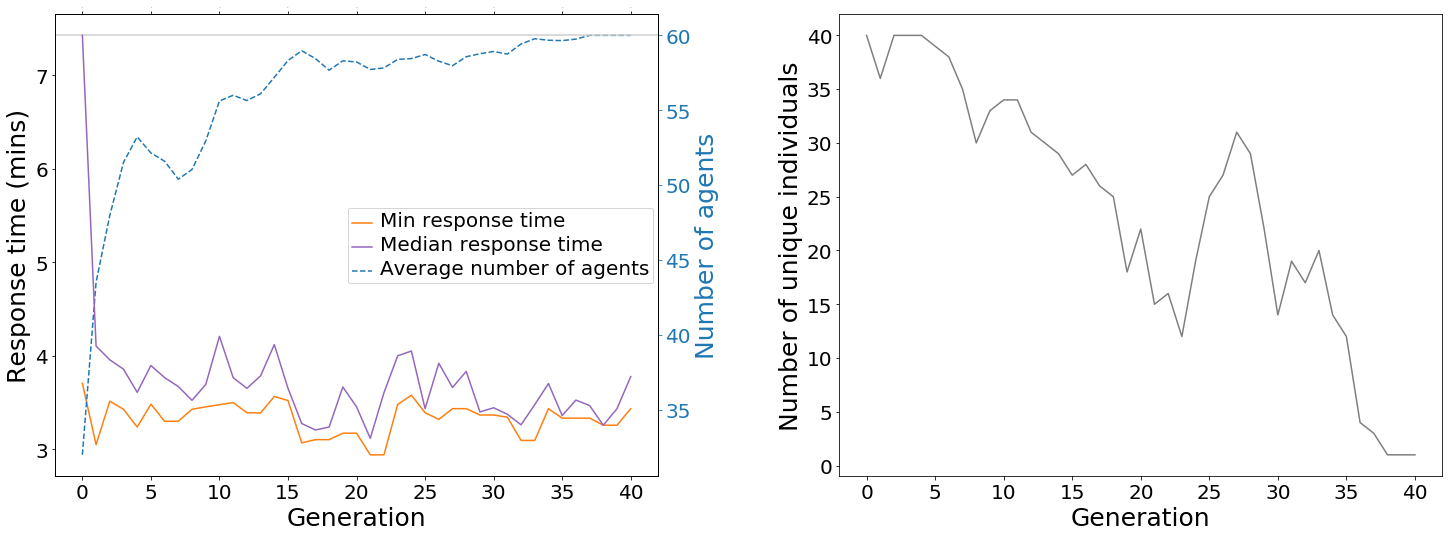

In [8]:
gen = logbook.select("gen")
fit_avg = logbook.chapters["fitness"].select("avg")
fit_med = logbook.chapters["fitness"].select("median")
fit_mins = logbook.chapters["fitness"].select("min")
num_vehicle_avgs = logbook.chapters["num_vehicles"].select("avg")

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20,7))
fig.tight_layout(h_pad=5, w_pad=15)

#GRAPH 1: Response time and number of agents

ax1 = axes[0]
line1 = ax1.plot(gen, fit_mins, color="tab:orange", label="Min response time")
ax1.set_xlabel("Generation", fontsize = 25)
ax1.set_ylabel("Response time (mins)", color="black", fontsize =25)
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)

ax2 = ax1.twinx()
line2 = ax2.plot(gen, num_vehicle_avgs, color="tab:blue", label="Average number of agents", linestyle='dashed')
ax2.set_ylabel("Number of agents", color="tab:blue", fontsize = 25)
ax2.tick_params(axis='y', labelsize=20, colors="tab:blue")
ax2.axhline(60, color='#cfcfcf')


ax3 = ax1.twiny()
line3 = ax3.plot(gen, fit_med, color="tab:purple", label="Median response time")
ax3.tick_params(axis='x', labelsize=0)

    
lns = line1 +  line3 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")

leg = ax1.get_legend()
leg.get_texts()[0].set_fontsize(20)
  
    
    
#GRAPH 2: Diversity plot

ax4= axes[1]
list_num_unique_strat = []
for gen in range(0, len(logbook)):
    with open('results/scenario{}/population_gen_{}_scenario{}'.format(scenario_num, gen, scenario_num), 'rb') as f:
        test = pickle.load(f)
    list_num_unique_strat.append(len([list(x) for x in set(tuple(x) for x in test)]))

line1 = ax4.plot(range(0, len(logbook)), list_num_unique_strat, "-", color="tab:grey",  label="Min Fitness")
ax4.set_xlabel("Generation", fontsize = 25)
ax4.set_ylabel("Number of unique individuals", color="black", fontsize = 25)
ax4.tick_params(axis='x', labelsize= 20)
ax4.tick_params(axis='y', labelsize= 20)

plt.show()

## Visualise best individuals

In [9]:
with open('results/scenario{}/dict_final_pop_scenario{}.pkl'.format(scenario_num, scenario_num), 'rb') as f:
    dict_final_pop =pickle.load(f)
print('Number of individuals in final populaiton: {}'.format(len(set(list(dict_final_pop.keys())))))

Number of individuals in final populaiton: 1


In [10]:
# remove inds with more agents than the constraint (60 agents for Detroit)
new_dict_final_pop = {k: round(v, 3) for k, v in dict_final_pop.items() if sum(k) <= 60}
len(new_dict_final_pop)

1

In [11]:
print('Fitness of the final individuals:')
list(new_dict_final_pop.values())

Fitness of the final individuals:


[3.546]

### Get the best ind and their fitness

In [12]:
minval = min(new_dict_final_pop.values())
best_ind = [k for k, v in new_dict_final_pop.items() if v==minval][0]
print('Number of agents in best individual:', sum(best_ind))

print('Fitness of best individual:', [v for k, v in new_dict_final_pop.items() if v==minval][0])

Number of agents in best individual: 60
Fitness of best individual: 3.546


### Plot best configuration

In [25]:
def plotConfiguration(config, colour = '#86beda', legend_label = 'Staffed'):
    precincts = gpd.read_file('./../../../data/precincts/precincts.shp')

    scas = gpd.read_file('./../../../data/patrol_beats/patrol_beats.shp')
    scas.loc[:,['name']] = scas.name.astype('int64')
    #scas = scas.join(num_inc_df, on = 'name')
    # create new column with has_patrol (config)
    scas['has_patrol'] = config
    #scas['has_patrol'] = ['Staffed' if sca['has_patrol'] else 'Unstaffed' for index, sca in scas.iterrows()]
    scas['has_patrol'] = scas['has_patrol'].astype('str')

    # create simple linear colormap that maps grey to blue
    cmap = LinearSegmentedColormap.from_list(
        'mycmap', [(0, 'white'), (1, colour)])


    fig, ax = plt.subplots(1, figsize=(30, 30))
    fig.tight_layout()


    scas.plot(ax=ax, column='has_patrol', edgecolor= 'black', legend=True, cmap=cmap)
    #scas.apply(lambda x: ax.annotate(s=int(x['name']), xy=x.geometry.centroid.coords[0], ha='center', fontfamily = 'sans-serif', weight='bold', fontsize=18),axis=1);

    for index, sca in scas.iterrows():
        if sca['name'] == 712 :
            ax.annotate(int(sca['name']), # this is the text
                        xy=sca.geometry.centroid.coords[0],
                        weight='bold', 
                        fontsize=18,
                        textcoords="offset points", # how to position the text
                        xytext=(0,-15),
                        ha='center')
        elif sca['name'] == 1105 :
                ax.annotate(int(sca['name']), # this is the text
                            xy=sca.geometry.centroid.coords[0],
                            weight='bold', 
                            fontsize=18,
                            textcoords="offset points", # how to position the text
                            xytext=(0,25),
                            ha='center')
        elif sca['name'] == 702 :
                ax.annotate(int(sca['name']), # this is the text
                            xy=sca.geometry.centroid.coords[0],
                            weight='bold', 
                            fontsize=18,
                            textcoords="offset points", # how to position the text
                            xytext=(0,-10),
                            ha='center')
        elif sca['name'] == 908 :
                ax.annotate(int(sca['name']), # this is the text
                            xy=sca.geometry.centroid.coords[0],
                            weight='bold', 
                            fontsize=18,
                            textcoords="offset points", # how to position the text
                            xytext=(10,0),
                            ha='center')
        else : 
            ax.annotate(int(sca['name']), # this is the text
                            xy=sca.geometry.centroid.coords[0],
                            weight='bold', 
                            fontsize=18,
                            ha='center')




    #Precincts
    precincts.boundary.plot(ax=ax, linewidth = 5, color = 'black', zorder = 1)

    ax.get_legend().remove()

    handles = [
        Patch(color=colour, label=legend_label, fill=True) 
    ]

    fig.legend(handles=handles,
               loc="lower center",
               #bbox_to_anchor=(0., 0.),
               fontsize=30,
               borderaxespad=0.1,
              );

    ## LEGEND COLORBAR
    """sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=scas['num_inc_per_day_per_area'].min(), vmax=scas['num_inc_per_day_per_area'].max()))
    cbar = plt.colorbar(sm, fraction=0.025, pad=0.02, orientation= 'horizontal')
    cbar.ax.tick_params(labelsize=25)
    cbar.set_label(label='Average daily number of historical crimes per km2',size=25)
     """

    ax.axis('off')


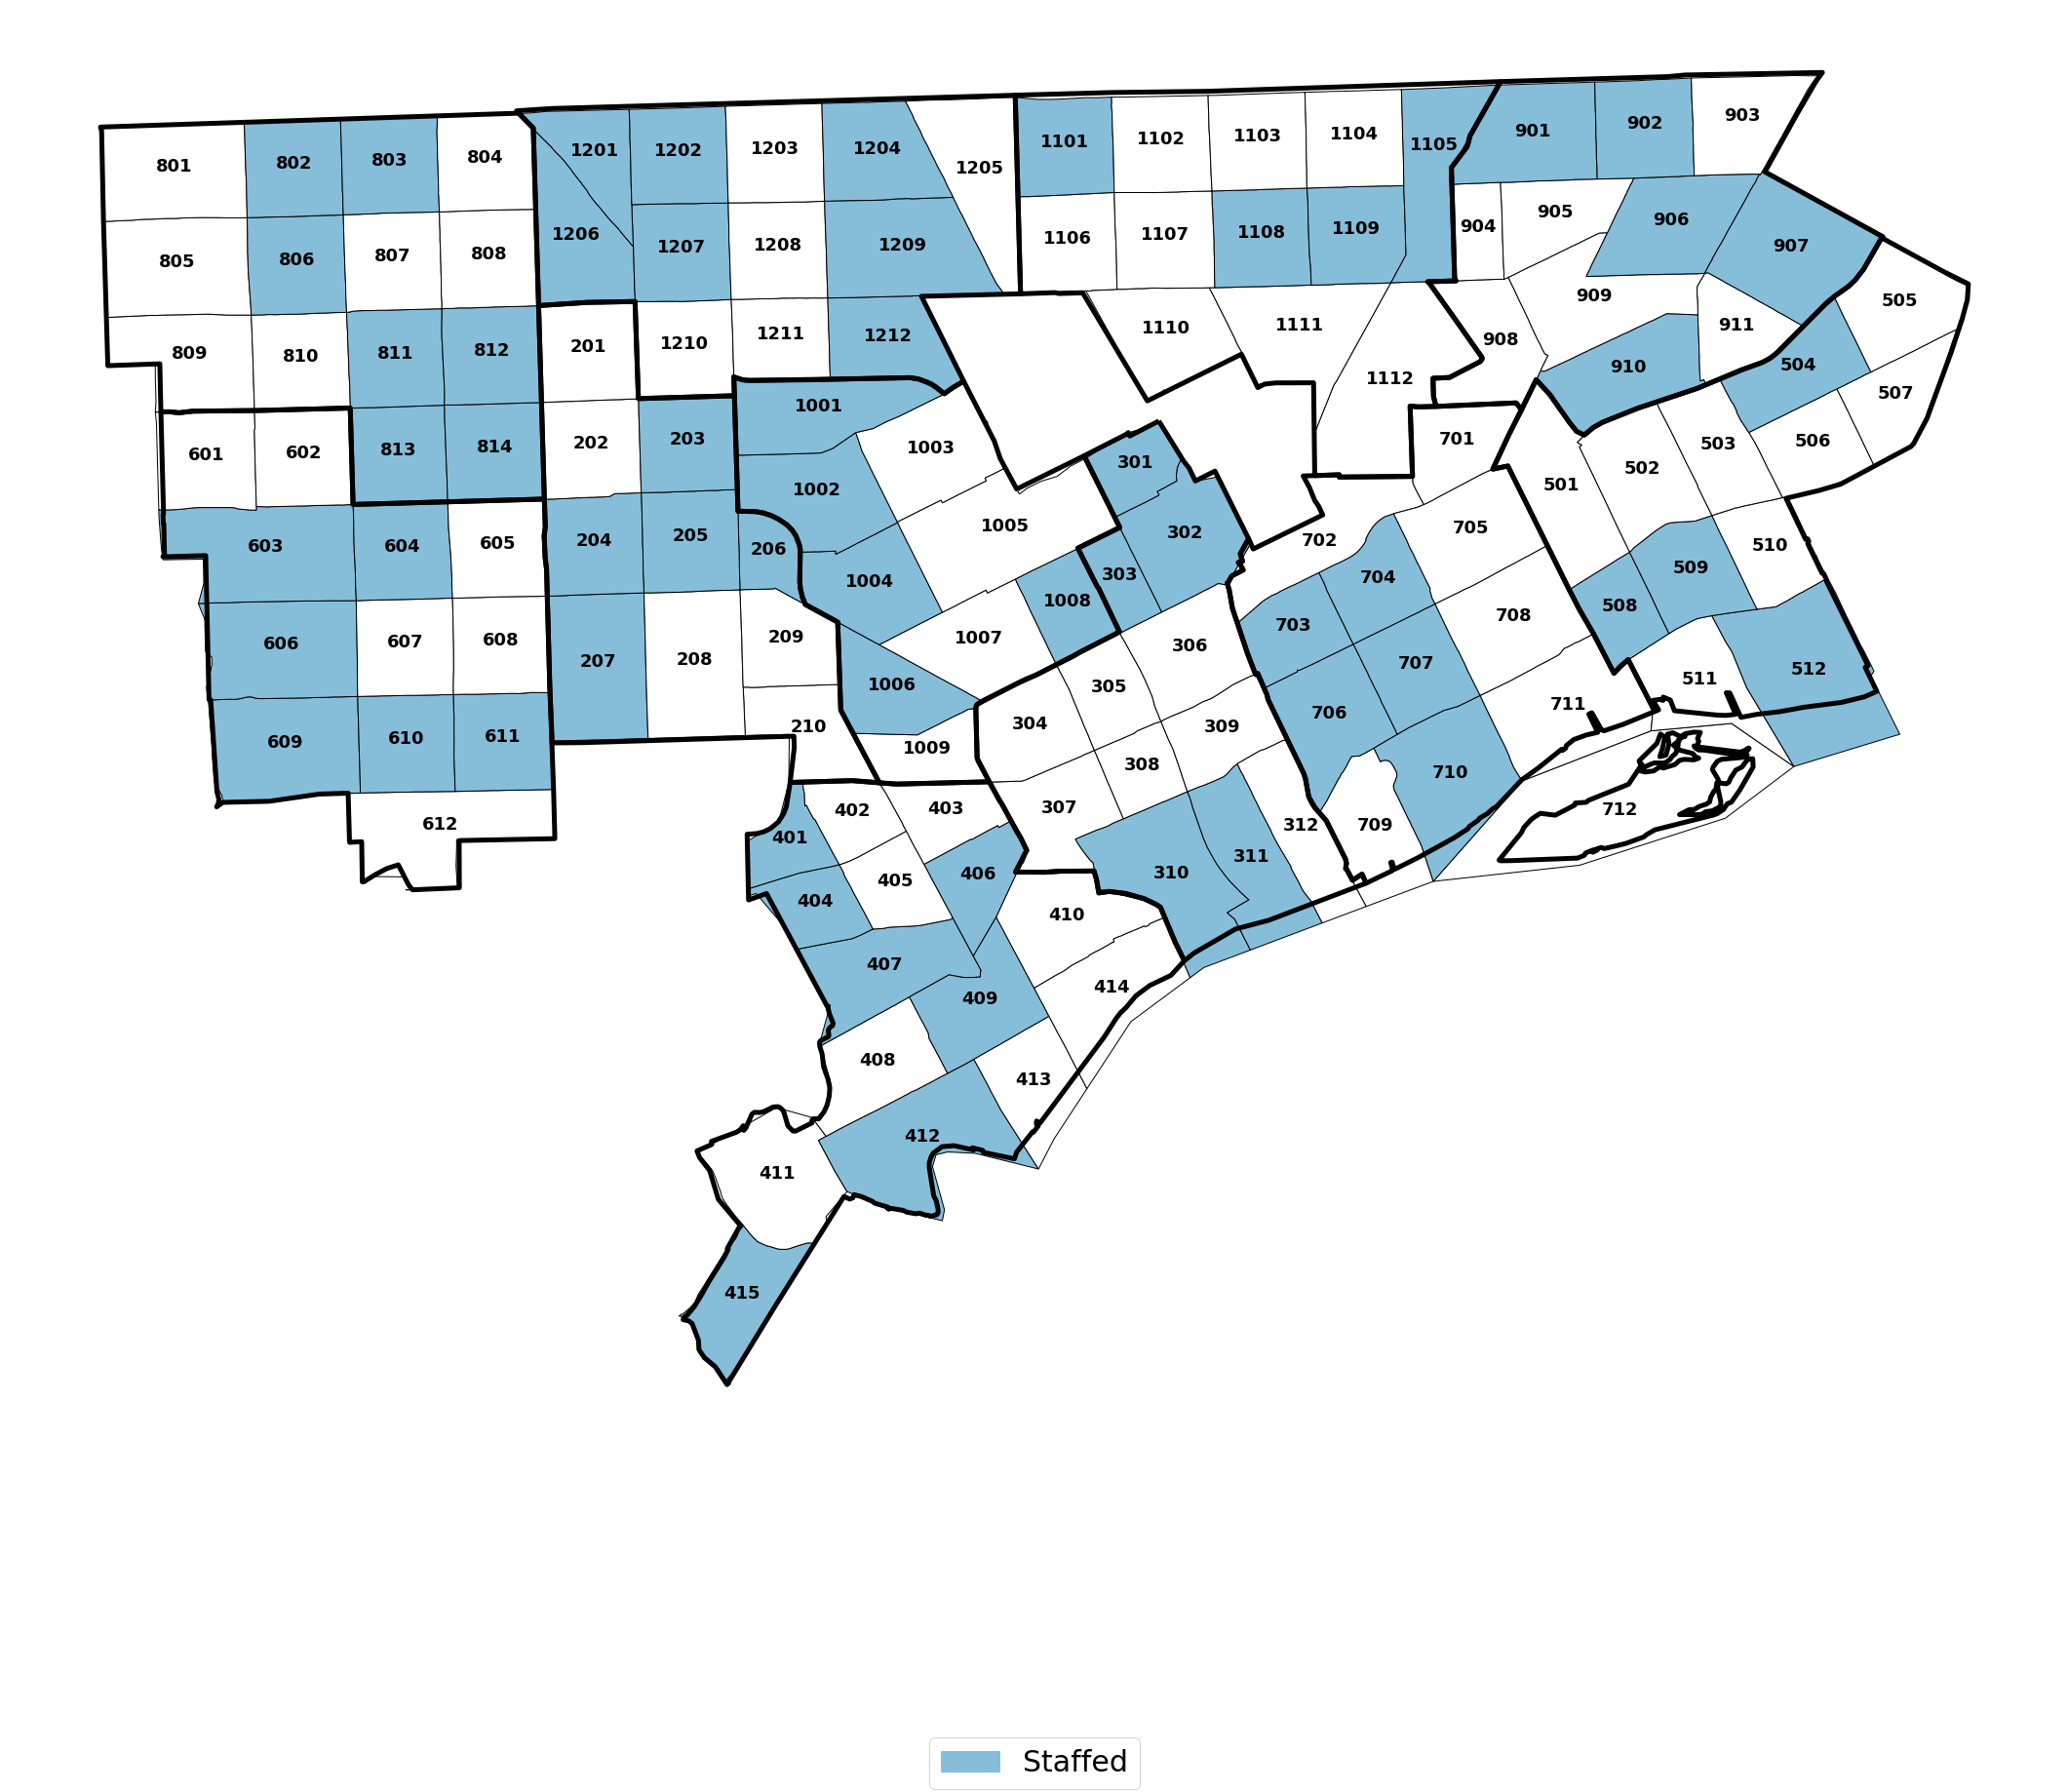

In [26]:
plotConfiguration(best_ind)

plt.savefig('./images/GA_single_obj_best_ind_map_scenario{}.png'.format(scenario_num), bbox_inches = 'tight')
plt.show()